## Pre-process and Modeling


#### Import Libraries and Data
---

In [28]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Import data from combined_clean csv
comb_clean = pd.read_csv('.\data\combined_clean.csv')

In [3]:
# Display comb_clean data set
comb_clean.head()

,authors,title,body,category,title_clean,body_clean,total_clean
0,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,investing,additional million people filed unemployment week,week ending may advance figure seasonally adj...,additional million people filed unemployment w...
1,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,investing,wait buffett give clear signal stock economy l...,buffett everything see economy bounce term eco...,wait buffett give clear signal stock economy l...
2,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,investing,fed chairman jerome powell paint grim economic...,powell speech morning gave decidedly negative ...,fed chairman jerome powell paint grim economic...
3,t3_gj4i1u,[WSJ] Uber Eats are losing money on delivery o...,https://www.wsj.com/articles/america-is-stuck-...,investing,wsj uber eats losing money delivery order bare...,coronavirus pandemic handed food delivery comp...,wsj uber eats losing money delivery order bare...
4,t3_gjl09q,"NCLH misses earnings expectations, reports eno...",This one should be fun to watch today. They w...,investing,nclh miss earnings expectation report enough l...,one fun watch today much currently feeling goi...,nclh miss earnings expectation report enough l...


#### Model Prep
---
Convert Investing and Personal Finance into binary labels:

- 1 for Investing
- 0 for Personal Finance

In [4]:
comb_clean['category'] = comb_clean['category'].map({'investing': 1, 'personalfinance': 0})
comb_clean.head()

,authors,title,body,category,title_clean,body_clean,total_clean
0,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,1,additional million people filed unemployment week,week ending may advance figure seasonally adj...,additional million people filed unemployment w...
1,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,1,wait buffett give clear signal stock economy l...,buffett everything see economy bounce term eco...,wait buffett give clear signal stock economy l...
2,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,1,fed chairman jerome powell paint grim economic...,powell speech morning gave decidedly negative ...,fed chairman jerome powell paint grim economic...
3,t3_gj4i1u,[WSJ] Uber Eats are losing money on delivery o...,https://www.wsj.com/articles/america-is-stuck-...,1,wsj uber eats losing money delivery order bare...,coronavirus pandemic handed food delivery comp...,wsj uber eats losing money delivery order bare...
4,t3_gjl09q,"NCLH misses earnings expectations, reports eno...",This one should be fun to watch today. They w...,1,nclh miss earnings expectation report enough l...,one fun watch today much currently feeling goi...,nclh miss earnings expectation report enough l...


In [5]:
# Check for null
comb_clean.isnull().sum()

authors         0
title           0
body            2
category        0
title_clean     2
body_clean     22
total_clean     0
dtype: int64

In [6]:
# Replace nulls with Na's
comb_clean.fillna('', inplace=True)

In [7]:
# Check if the null values have been replaced
# Check data type of the columns
comb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 7 columns):
authors        1742 non-null object
title          1742 non-null object
body           1742 non-null object
category       1742 non-null int64
title_clean    1742 non-null object
body_clean     1742 non-null object
total_clean    1742 non-null object
dtypes: int64(1), object(6)
memory usage: 95.3+ KB


#### Baseline Score
---

In [8]:
# Check whether the target is balance
comb_clean['category'].value_counts(normalize=True)

0    0.514925
1    0.485075
Name: category, dtype: float64

#### Create the Training and Test datasets
---

In [9]:
# Input predictor variable
X = comb_clean['total_clean']
y = comb_clean['category']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

# Dimension of X_train, X_test
print(X_train.shape)
print(X_test.shape)

(1167,)
(575,)


#### Logistic Regression - CountVectorizer
---

Set up a pipeline with two stages:

- CountVectorizer (transformer)
- LogisticRegression (estimator)

In [10]:
# Set up pipeline
pipe_cv = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression())
])
# Search over the following values of hyperparameters:
pipe_params_cv = {

    'cvec__max_features':[100, 200],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'lr__solver': ['lbfgs'],
    'lr__max_iter': [200],
    'lr__random_state': [42]
}
# Instantiate GridSearchCV
gs_lr_cv = GridSearchCV(pipe_cv, param_grid=pipe_params_cv, cv=5, verbose=1)
# Fit GridSearch to training data.
gs_lr_cv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   25.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [11]:
# Best Score, Parameter and Model Using GridSearch
print(f"Best Score: {round(gs_lr_cv.best_estimator_.score(X_train, y_train,),4)}")
print(f"Best Model: {round(gs_lr_cv.best_estimator_.score(X_test, y_test,),4)}")
print(f"Best Parameter: {gs_lr_cv.best_params_}")

Best Score: 0.9734
Best Model: 0.9113
Best Parameter: {'cvec__max_df': 0.9, 'cvec__max_features': 200, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'lr__max_iter': 200, 'lr__random_state': 42, 'lr__solver': 'lbfgs'}


#### Logistic Regression - TfidfVectorizer
---

Set up a pipeline with two stages:

- TfidfVectorizer (transformer)
- LogisticRegression (estimator)

In [12]:
# Set up a pipeline
pipe_tf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

# Search over the following values of hyperparameters:
pipe_params_tf = {
    'tvec__max_features':[100, 200],
    'tvec__min_df': [2,3],
    'tvec__max_df': [0.9,0.95],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'lr__solver': ['lbfgs'],
    'lr__max_iter': [200],
    'lr__random_state': [42]
}
# Instantiate GridSearchCV
gs_lr_tf = GridSearchCV(pipe_tf, param_grid=pipe_params_tf, cv=5, verbose=1)
# Fit GridSearch to training data.
gs_lr_tf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   26.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [13]:
# Best Score, Parameter and Model Using GridSearch
print(f"Best Score: {round(gs_lr_tf.best_estimator_.score(X_train, y_train,),4)}")
print(f"Best Model: {round(gs_lr_tf.best_estimator_.score(X_test, y_test,),4)}")
print(f"Best Parameter: {gs_lr_tf.best_params_}")

Best Score: 0.9477
Best Model: 0.92
Best Parameter: {'lr__max_iter': 200, 'lr__random_state': 42, 'lr__solver': 'lbfgs', 'tvec__max_df': 0.9, 'tvec__max_features': 200, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}


#### Naive Bayes - CountVectorizer
---

Set up a pipeline with two stages:

- CountVectorizer (transformer)
- Naive Bayes (estimator)

In [14]:
# Set up a pipeline
pipe_nb_cv = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())])

# Search over the following values of hyperparameters:
param_nb_cv = {
    'cvec__max_features':[100, 200],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
}
# Instantiate GridSearchCV
gs_nb_cv = GridSearchCV(pipe_nb_cv, param_grid=param_nb_cv, cv=5, verbose=1)
# Fit GridSearch to training data.
gs_nb_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [15]:
# Best Score, Parameter and Model Using GridSearch
print(f"Best Score: {round(gs_nb_cv.best_estimator_.score(X_train, y_train,),4)}")
print(f"Best Model: {round(gs_nb_cv.best_estimator_.score(X_test, y_test,),4)}")
print(f"Best Parameter: {gs_nb_cv.best_params_}")

Best Score: 0.9297
Best Model: 0.9165
Best Parameter: {'cvec__max_df': 0.9, 'cvec__max_features': 200, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}


#### Naive Bayes - TfidfVectorizer
---

Set up a pipeline with two stages:

- TfidfVectorizer (transformer)
- Naive Bayes (estimator)

In [16]:
# Set up a pipeline 
pipe_nb_tf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
# Search over the following values of hyperparameters:
params_nb_tf = {   
    'tvec__max_features':[100, 200],
    'tvec__min_df': [2,3],
    'tvec__max_df': [0.9,0.95],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
}
# Instantiate GridSearchCV
gs_nb_tf = GridSearchCV(pipe_nb_tf, param_grid=params_nb_tf, cv=5, verbose=1)
# Fit GridSearch to training data.
gs_nb_tf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   26.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [17]:
# Best Score, Parameter and Model Using GridSearch
print(f"Best Score: {round(gs_nb_tf.best_estimator_.score(X_train, y_train,),4)}")
print(f"Best Model: {round(gs_nb_tf.best_estimator_.score(X_test, y_test,),4)}")
print(f"Best Parameter: {gs_nb_tf.best_params_}")

Best Score: 0.9203
Best Model: 0.9113
Best Parameter: {'tvec__max_df': 0.9, 'tvec__max_features': 200, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}


#### Model Evaluation
---


- Classification Report

In [20]:
# Generate our predictions and classification report for the model with the best score in both Log Reg and Naive Bayes

# Logistic Regression with Tfidf Vectorizer
pred_lr_tf = gs_lr_tf.predict(X_test)
print(classification_report(y_test, pred_lr_tf))
print('---------------------------------------------------------')
# Naive Bayes with Count Vectorizer
pred_nb_cv = gs_nb_cv.predict(X_test)
print(classification_report(y_test, pred_nb_cv))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       296
           1       0.92      0.91      0.92       279

    accuracy                           0.92       575
   macro avg       0.92      0.92      0.92       575
weighted avg       0.92      0.92      0.92       575

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       296
           1       0.92      0.91      0.91       279

    accuracy                           0.92       575
   macro avg       0.92      0.92      0.92       575
weighted avg       0.92      0.92      0.92       575



- Confusion Matrix - Logistic Regression with TfidfVectorizer

In [21]:
# Generate a confusion matrix
# Assign to TN,FP,FN and TP
tn, fp, fn, tp = confusion_matrix(y_test, pred_lr_tf).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 275
False Positives: 21
False Negatives: 25
True Positives: 254


In [22]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Model Accuracy: {(Accuracy)}")
Sensitivity = tp / (tp + fn)
print(f"Model Sensitivity: {Sensitivity}")
Specificity = tn / (tn + fp)
print(f"Model Specificity: {Specificity}")
Precision = tp / (tp + fp)
print(f"Model Precision: {Precision}")

Model Accuracy: 0.92
Model Sensitivity: 0.910394265232975
Model Specificity: 0.9290540540540541
Model Precision: 0.9236363636363636


- Confusion Matrix - Naive Bayes with CountVectorizer

In [23]:
# Generate a confusion matrix
# Assign to TN,FP,FN and TP
tn, fp, fn, tp = confusion_matrix(y_test, pred_nb_cv).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 273
False Positives: 23
False Negatives: 25
True Positives: 254


In [24]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Model Accuracy: {(Accuracy)}")
Sensitivity = tp / (tp + fn)
print(f"Model Sensitivity: {Sensitivity}")
Specificity = tn / (tn + fp)
print(f"Model Specificity: {Specificity}")
Precision = tp / (tp + fp)
print(f"Model Precision: {Precision}")

Model Accuracy: 0.9165217391304348
Model Sensitivity: 0.910394265232975
Model Specificity: 0.9222972972972973
Model Precision: 0.9169675090252708


After evaluating both Logistic Regression with TfidfVectorizer and Naive Bayes with CountVetorizer, notice Logistic Regression model performed better with higher accuracy, specificity and precision scores compared to Naive Bayes.

#### ROC Curves and AUC
---

In [34]:
# Function that will create an ROC curve and AUC
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

def get_roc_curve(model, title):
    ns_probs = [0 for _ in range(len(y_test))] # generate a no skill prediction (majority class)
    # fit a model
    model = GridSearchCV(pipe_tf, param_grid=pipe_params_tf, cv=5, verbose=1)
    model.fit(X_train, y_train)
    # predict probabilities
    model_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    model_probs = model_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, model_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, model_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Base line')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve')
    # axis labels
    plt.title(title, fontsize= 18)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


No Skill: ROC AUC=0.500
Model: ROC AUC=0.963


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   27.0s finished


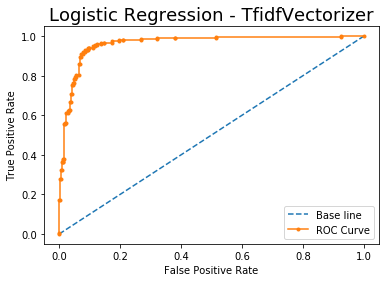

In [35]:
get_roc_curve(pred_lr_tf, 'Logistic Regression - TfidfVectorizer')

#### Conclusion
___

The Naive Bayes with CountVectorizer and Logistic Regression with TfidfVectorizer worked very well with an high train and test score, even though both subreddits were almost in the same category.
Evaluated the model and notice the accuracy level is really high with 92% for Logistic Regression with TfidfVectorizer and 91.67% for Naive Bayes with CountVectorizer.<br>
Model precision of Logistic Regression is slightly higher to Naive Bayes at 92.36% compared to 91.69%.<br>
This could be attributed to the current market condition, with Covid-19 having a negative impact on job securities and financial stability.<br>
Hence more retail investors, would not want to venture into riskier investments and focus more to reduce their reliabilities.

#### Recommendation
___

We can tune the parameters of the model, to get an more accurate however it's really time consuming.
Hence I suggest to allocate more time on the modeling section, as it's really important to obatin the optimum results.<br>

Right now with investors appetite at a all time low, I would suggest financial consultants to work with their current and potential clients in other financial services like offering them to refinance with a lower interest rates, taking up insurance or short term saving plans with interest<br> 

This can been seen in the word cloud where student loan, debt, credit cards and tax were ones most mentioned.